# Using ERDDAP advanced search 

Use ERDDAP's RESTful advanced search to find and retrieve all variable data within a specified bounding box and time extent.

Rich Signell (rsignell@usgs.gov) and Filipe Fernandes (ocefpaf@gmail.com)

In [1]:
start = '2016-07-10T00:00:00Z'
stop  = '2017-02-10T00:00:00Z'
lat_min =  39.
lat_max =  41.5
lon_min = -72.
lon_max = -69.
standard_name = 'sea_water_temperature'

In [2]:
import pandas as pd

base = (
    'https://data.ioos.us/gliders/erddap/search/advanced.csv'
    '?page=1'
    '&itemsPerPage=1000'
    '&searchFor='
    '&protocol=(ANY)'
    '&cdm_data_type=(ANY)'
    '&institution=(ANY)'
    '&ioos_category=(ANY)'
    '&keywords=(ANY)'
    '&long_name=(ANY)'
    '&standard_name={}'
    '&variableName=(ANY)'
    '&maxLat={}'
    '&minLon={}'
    '&maxLon={}'
    '&minLat={}'
    '&minTime={}'
    '&maxTime={}').format

url = base(
    standard_name,
    lat_max,
    lon_min,
    lon_max,
    lat_min,
    start,
    stop
)

dft = pd.read_csv(url, usecols=['Title', 'Summary', 'Institution'])  

print('Glider Datasets Found = {}'.format(len(dft)))
print(url)
dft

Glider Datasets Found = 3
https://data.ioos.us/gliders/erddap/search/advanced.csv?page=1&itemsPerPage=1000&searchFor=&protocol=(ANY)&cdm_data_type=(ANY)&institution=(ANY)&ioos_category=(ANY)&keywords=(ANY)&long_name=(ANY)&standard_name=sea_water_temperature&variableName=(ANY)&maxLat=41.5&minLon=-72.0&maxLon=-69.0&minLat=39.0&minTime=2016-07-10T00:00:00Z&maxTime=2017-02-10T00:00:00Z


,Title,Summary,Institution
0,blue-20160818T1448,U.S. IOOS Mid-Atlantic Regional Association Co...,University of Massachusetts Darmouth
1,silbo-20160413T1534,The Silbo Challenger mission is a partnership ...,Teledyne Webb Research Corporation
2,whoi_406-20160902T1700,Slocum glider dataset gathered as part of the ...,Woods Hole Oceanographic Institution


In [3]:
def download_df(glider_id):
    from pandas import DataFrame, read_csv
#    from urllib.error import HTTPError
    uri = ('https://data.ioos.us/gliders/erddap/tabledap/{}.csv'
           '?trajectory,wmo_id,time,latitude,longitude,depth,pressure,temperature'
           '&time>={}'
           '&time<={}'
           '&latitude>={}'
           '&latitude<={}'
           '&longitude>={}'
           '&longitude<={}').format
    url = uri(glider_id,start,stop,lat_min,lat_max,lon_min,lon_max)
    print(url)
    # Not sure if returning an empty df is the best idea.
    try:
        df = read_csv(url, index_col='time', parse_dates=True, skiprows=[1])
    except:
        df = pd.DataFrame()
    return df

In [4]:
# We need to add the "if 'All' not in glider_id" logic here.
    
dfs = list(map(download_df, dft['Title'].values))

https://data.ioos.us/gliders/erddap/tabledap/blue-20160818T1448.csv?trajectory,wmo_id,time,latitude,longitude,depth,pressure,temperature&time>=2016-07-10T00:00:00Z&time<=2017-02-10T00:00:00Z&latitude>=39.0&latitude<=41.5&longitude>=-72.0&longitude<=-69.0
https://data.ioos.us/gliders/erddap/tabledap/silbo-20160413T1534.csv?trajectory,wmo_id,time,latitude,longitude,depth,pressure,temperature&time>=2016-07-10T00:00:00Z&time<=2017-02-10T00:00:00Z&latitude>=39.0&latitude<=41.5&longitude>=-72.0&longitude<=-69.0
https://data.ioos.us/gliders/erddap/tabledap/whoi_406-20160902T1700.csv?trajectory,wmo_id,time,latitude,longitude,depth,pressure,temperature&time>=2016-07-10T00:00:00Z&time<=2017-02-10T00:00:00Z&latitude>=39.0&latitude<=41.5&longitude>=-72.0&longitude<=-69.0


In [5]:
df = pd.concat(dfs)

In [6]:
print('Total Data Values Found: {}'.format(len(df)))

Total Data Values Found: 87032


In [7]:
df.head()

,trajectory,wmo_id,latitude,longitude,depth,pressure,temperature
time,,,,,,,
2016-08-18 14:59:17,blue-20160818T1448,4801913,41.247997,-70.957159,4.78,4.78,22.6100
2016-08-18 14:59:17,blue-20160818T1448,4801913,41.247997,-70.957159,5.72,5.72,22.5725
2016-08-18 14:59:17,blue-20160818T1448,4801913,41.247997,-70.957159,7.07,7.07,22.0349
2016-08-18 14:59:17,blue-20160818T1448,4801913,41.247997,-70.957159,8.30,8.30,21.0681
2016-08-18 14:59:17,blue-20160818T1448,4801913,41.247997,-70.957159,10.14,10.14,17.2991


In [8]:
df.tail()

,trajectory,wmo_id,latitude,longitude,depth,pressure,temperature
time,,,,,,,
2016-09-20 13:32:33,whoi_406-20160902T1700,4801945,41.048109,-70.928635,5.19,5.19,18.9365
2016-09-20 13:32:33,whoi_406-20160902T1700,4801945,41.048109,-70.928635,4.82,4.82,18.9450
2016-09-20 13:32:33,whoi_406-20160902T1700,4801945,41.048109,-70.928635,4.44,4.44,18.9572
2016-09-20 13:32:33,whoi_406-20160902T1700,4801945,41.048109,-70.928635,4.06,4.06,18.9713
2016-09-20 13:32:33,whoi_406-20160902T1700,4801945,41.048109,-70.928635,3.52,3.52,18.9974


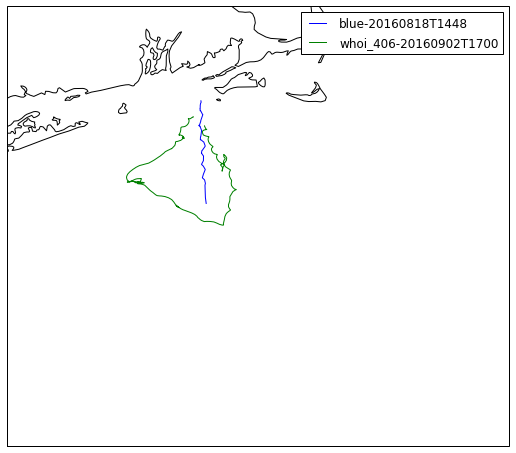

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(
    figsize=(9, 9),
    subplot_kw=dict(projection=ccrs.PlateCarree())
)
ax.coastlines(resolution='10m')
dx = dy = 0.5
ax.set_extent([lon_min-dx, lon_max+dx, lat_min-dy, lat_max+dy])

g = df.groupby('trajectory')
for glider in g.groups:
    traj = df[df['trajectory'] == glider]
    ax.plot(traj['longitude'], traj['latitude'], label=glider)

ax.legend();

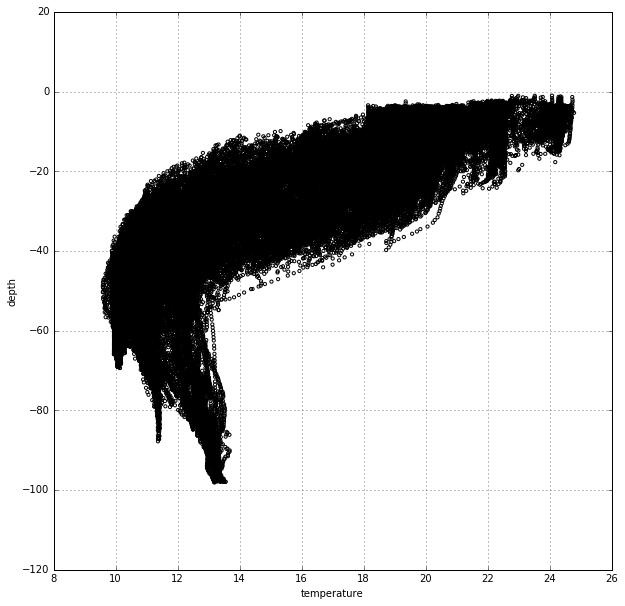

In [10]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['temperature'],-df['pressure'],
            facecolors='none', edgecolors='black',s=10);
plt.ylabel('depth'); plt.xlabel('temperature');
plt.grid()